<a href="https://colab.research.google.com/github/sumitc29/NLP/blob/master/Verloop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

there are two task to complete

1.  classification , binary (FindConnection or DepartureTime)
2.  NER recognition task for a given word in sentences / customised NER recognition

          *   Using Spacy
          *   Using customized token classification mechanism
          *   Using Seq2Seq modelling using LSTM
          *   Using Transfer learning
          




  

## Data download and preprocess

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#drive.flush_and_unmount()

Mounted at /content/drive


In [2]:
import json
with open('/content/drive/MyDrive/ChatbotCorpus.json', 'r') as f:
  data = json.load(f)

print(data.keys())


dict_keys(['name', 'lang', 'sentences'])


In [3]:
text_data = [each['text'] for each in data['sentences']]
intent = [each['intent'] for each in data['sentences']]
entities = [each['entities'] for each in data['sentences']]

In [4]:
print(text_data[:5], intent[:5])

['i want to go marienplatz', 'when is the next train in muncher freiheit?', 'when does the next u-bahn leaves from garching forschungszentrum?', 'from olympia einkaufszentrum to hauptbahnhof', 'when is the next train from winterstraße 12 to kieferngarten'] ['FindConnection', 'DepartureTime', 'DepartureTime', 'FindConnection', 'FindConnection']


In [4]:
import pandas as pd
import numpy as np

# **Customised NER recognition problem**

## *NER using Spacy with nad custom entitties*



In [6]:
from __future__ import unicode_literals, print_function
import plac
import random
from pathlib import Path
import spacy
from tqdm import tqdm

In [7]:
#out1  = [(new_text_data[index],{'entities':[(new_text_data[index].index(new_text_data[index].split(" ")[int(each_entity_info['start'])])  , new_text_data[index].index(new_text_data[index].split(" ")[int(each_entity_info['stop'])])  ,each_entity_info['entity']) for each_entity_info in entities[index]]}) for index in range(len('text_data'))]
new_text_data = [each_text_data.replace('-'," ").replace("?"," ") for each_text_data in text_data]
TRAIN_DATA  = [(new_text_data[index],{'entities':[(new_text_data[index].index(new_text_data[index].split(" ")[int(each_entity_info['start'])])  , new_text_data[index].index(new_text_data[index].split(" ")[int(each_entity_info['stop'])]) + len(new_text_data[index].split(" ")[int(each_entity_info['stop'])]) ,each_entity_info['entity']) for each_entity_info in entities[index]]}) for index in range(len('text_data'))]

In [8]:
model = None
n_iter=100

if model is not None:
    nlp = spacy.load(model)  
    print("Loaded model '%s'" % model)
else:
    nlp = spacy.blank('en')  
    print("Created blank 'en' model")

#set up the pipeline

if 'ner' not in nlp.pipe_names:
    ner = nlp.create_pipe('ner')
    nlp.add_pipe(ner, last=True)
else:
    ner = nlp.get_pipe('ner')


Created blank 'en' model


In [9]:
for _, annotations in TRAIN_DATA:
    for ent in annotations.get('entities'):
        ner.add_label(ent[2])

In [10]:
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']

In [11]:
with nlp.disable_pipes(*other_pipes):  # only train NER
    optimizer = nlp.begin_training()
    for itn in range(n_iter):
        random.shuffle(TRAIN_DATA)
        losses = {}
        for text, annotations in tqdm(TRAIN_DATA):
            nlp.update(
                [text],  
                [annotations],  
                drop=0.5,  
                sgd=optimizer,
                losses=losses)
        print(losses)

100%|██████████| 9/9 [00:00<00:00, 29.80it/s]


{'ner': 65.65205943584442}


100%|██████████| 9/9 [00:00<00:00, 32.53it/s]


{'ner': 46.85841706767678}


100%|██████████| 9/9 [00:00<00:00, 30.55it/s]


{'ner': 34.06882904769736}


100%|██████████| 9/9 [00:00<00:00, 30.32it/s]


{'ner': 35.96993949303578}


100%|██████████| 9/9 [00:00<00:00, 31.63it/s]


{'ner': 32.40771865611896}


100%|██████████| 9/9 [00:00<00:00, 30.03it/s]


{'ner': 28.134795676916838}


100%|██████████| 9/9 [00:00<00:00, 31.72it/s]


{'ner': 31.822492107297876}


100%|██████████| 9/9 [00:00<00:00, 31.01it/s]


{'ner': 21.819869709928753}


100%|██████████| 9/9 [00:00<00:00, 32.56it/s]


{'ner': 21.945083148389358}


100%|██████████| 9/9 [00:00<00:00, 31.14it/s]


{'ner': 23.526212713776147}


100%|██████████| 9/9 [00:00<00:00, 32.29it/s]


{'ner': 28.231555703526553}


100%|██████████| 9/9 [00:00<00:00, 31.84it/s]


{'ner': 18.454117181360573}


100%|██████████| 9/9 [00:00<00:00, 31.08it/s]


{'ner': 24.565908815921233}


100%|██████████| 9/9 [00:00<00:00, 30.90it/s]


{'ner': 17.417364919121333}


100%|██████████| 9/9 [00:00<00:00, 30.97it/s]


{'ner': 14.958545234380797}


100%|██████████| 9/9 [00:00<00:00, 30.93it/s]


{'ner': 12.837853413321442}


100%|██████████| 9/9 [00:00<00:00, 30.08it/s]


{'ner': 15.786749670875253}


100%|██████████| 9/9 [00:00<00:00, 32.82it/s]


{'ner': 10.781309353915473}


100%|██████████| 9/9 [00:00<00:00, 31.24it/s]


{'ner': 5.34161209939345}


100%|██████████| 9/9 [00:00<00:00, 30.34it/s]


{'ner': 6.823992906744463}


100%|██████████| 9/9 [00:00<00:00, 32.37it/s]


{'ner': 5.707131238575938}


100%|██████████| 9/9 [00:00<00:00, 32.47it/s]


{'ner': 4.170153088156576}


100%|██████████| 9/9 [00:00<00:00, 32.02it/s]


{'ner': 7.724585415187726}


100%|██████████| 9/9 [00:00<00:00, 30.47it/s]


{'ner': 3.853545497109436}


100%|██████████| 9/9 [00:00<00:00, 30.96it/s]


{'ner': 5.100176497474241}


100%|██████████| 9/9 [00:00<00:00, 31.23it/s]


{'ner': 4.087565596756952}


100%|██████████| 9/9 [00:00<00:00, 32.00it/s]


{'ner': 8.392313037237166}


100%|██████████| 9/9 [00:00<00:00, 32.48it/s]


{'ner': 4.696435818546839}


100%|██████████| 9/9 [00:00<00:00, 31.31it/s]


{'ner': 6.885810771702653}


100%|██████████| 9/9 [00:00<00:00, 31.61it/s]


{'ner': 4.2097180231386435}


100%|██████████| 9/9 [00:00<00:00, 33.11it/s]


{'ner': 3.5796529848883134}


100%|██████████| 9/9 [00:00<00:00, 32.60it/s]


{'ner': 10.147575001706759}


100%|██████████| 9/9 [00:00<00:00, 31.47it/s]


{'ner': 5.696384222607177}


100%|██████████| 9/9 [00:00<00:00, 30.21it/s]


{'ner': 3.688599331605661}


100%|██████████| 9/9 [00:00<00:00, 31.27it/s]


{'ner': 5.538128447658702}


100%|██████████| 9/9 [00:00<00:00, 30.08it/s]


{'ner': 2.143119542052221}


100%|██████████| 9/9 [00:00<00:00, 31.41it/s]


{'ner': 3.08625552566731}


100%|██████████| 9/9 [00:00<00:00, 33.38it/s]


{'ner': 8.962259545934037}


100%|██████████| 9/9 [00:00<00:00, 32.39it/s]


{'ner': 4.881404494658034}


100%|██████████| 9/9 [00:00<00:00, 32.36it/s]


{'ner': 1.689131097245721}


100%|██████████| 9/9 [00:00<00:00, 30.72it/s]


{'ner': 8.162774161273349}


100%|██████████| 9/9 [00:00<00:00, 31.78it/s]


{'ner': 7.499134997005451}


100%|██████████| 9/9 [00:00<00:00, 31.10it/s]


{'ner': 5.054030005566073}


100%|██████████| 9/9 [00:00<00:00, 31.39it/s]


{'ner': 2.378081194819983}


100%|██████████| 9/9 [00:00<00:00, 32.21it/s]


{'ner': 6.719936488990423}


100%|██████████| 9/9 [00:00<00:00, 31.80it/s]


{'ner': 1.8112172156866795}


100%|██████████| 9/9 [00:00<00:00, 32.49it/s]


{'ner': 2.338250309864839}


100%|██████████| 9/9 [00:00<00:00, 30.32it/s]


{'ner': 0.8869574450746484}


100%|██████████| 9/9 [00:00<00:00, 32.08it/s]


{'ner': 0.01237633647330143}


100%|██████████| 9/9 [00:00<00:00, 31.75it/s]


{'ner': 0.09593166270923294}


100%|██████████| 9/9 [00:00<00:00, 32.17it/s]


{'ner': 0.01343731950402973}


100%|██████████| 9/9 [00:00<00:00, 32.29it/s]


{'ner': 0.13993959901296654}


100%|██████████| 9/9 [00:00<00:00, 30.46it/s]


{'ner': 0.01098167795785057}


100%|██████████| 9/9 [00:00<00:00, 31.64it/s]


{'ner': 1.1571775182262005}


100%|██████████| 9/9 [00:00<00:00, 31.37it/s]


{'ner': 0.23067315508332814}


100%|██████████| 9/9 [00:00<00:00, 31.68it/s]


{'ner': 1.9630145640107808}


100%|██████████| 9/9 [00:00<00:00, 30.32it/s]


{'ner': 0.016278739799132358}


100%|██████████| 9/9 [00:00<00:00, 31.99it/s]


{'ner': 0.959373905054171}


100%|██████████| 9/9 [00:00<00:00, 31.44it/s]


{'ner': 0.0006248393878632142}


100%|██████████| 9/9 [00:00<00:00, 30.80it/s]


{'ner': 0.00041806485146735593}


100%|██████████| 9/9 [00:00<00:00, 30.62it/s]


{'ner': 0.0002626388389579906}


100%|██████████| 9/9 [00:00<00:00, 31.40it/s]


{'ner': 0.16043544014150812}


100%|██████████| 9/9 [00:00<00:00, 31.32it/s]


{'ner': 0.009219297269852007}


100%|██████████| 9/9 [00:00<00:00, 30.84it/s]


{'ner': 0.0006111101369793913}


100%|██████████| 9/9 [00:00<00:00, 29.41it/s]


{'ner': 1.624398874563693}


100%|██████████| 9/9 [00:00<00:00, 29.54it/s]


{'ner': 1.2244114194962654}


100%|██████████| 9/9 [00:00<00:00, 28.97it/s]


{'ner': 1.8946985425809233}


100%|██████████| 9/9 [00:00<00:00, 27.93it/s]


{'ner': 0.10419924418890156}


100%|██████████| 9/9 [00:00<00:00, 26.25it/s]


{'ner': 0.5645789682804798}


100%|██████████| 9/9 [00:00<00:00, 26.96it/s]


{'ner': 1.1107490757176726}


100%|██████████| 9/9 [00:00<00:00, 26.43it/s]


{'ner': 0.00047139939929658945}


100%|██████████| 9/9 [00:00<00:00, 25.18it/s]


{'ner': 0.4364459240046049}


100%|██████████| 9/9 [00:00<00:00, 26.00it/s]


{'ner': 0.002191222437244817}


100%|██████████| 9/9 [00:00<00:00, 24.33it/s]


{'ner': 0.024932185290884548}


100%|██████████| 9/9 [00:00<00:00, 24.33it/s]


{'ner': 0.03496099963495197}


100%|██████████| 9/9 [00:00<00:00, 23.93it/s]


{'ner': 1.5532985655505211}


100%|██████████| 9/9 [00:00<00:00, 23.48it/s]


{'ner': 0.006152575191698639}


100%|██████████| 9/9 [00:00<00:00, 23.32it/s]


{'ner': 0.796010945595858}


100%|██████████| 9/9 [00:00<00:00, 23.54it/s]


{'ner': 0.6197464550056972}


100%|██████████| 9/9 [00:00<00:00, 22.94it/s]


{'ner': 0.00010266637634799026}


100%|██████████| 9/9 [00:00<00:00, 23.94it/s]


{'ner': 3.660159684428133}


100%|██████████| 9/9 [00:00<00:00, 22.71it/s]


{'ner': 0.0015664199244952786}


100%|██████████| 9/9 [00:00<00:00, 23.14it/s]


{'ner': 9.227523204221321e-05}


100%|██████████| 9/9 [00:00<00:00, 22.68it/s]


{'ner': 0.15241988502770004}


100%|██████████| 9/9 [00:00<00:00, 21.91it/s]


{'ner': 0.0009290015441420661}


100%|██████████| 9/9 [00:00<00:00, 23.00it/s]


{'ner': 3.06702411238208e-07}


100%|██████████| 9/9 [00:00<00:00, 22.21it/s]


{'ner': 9.318218159709164e-05}


100%|██████████| 9/9 [00:00<00:00, 22.81it/s]


{'ner': 0.0011321205410986751}


100%|██████████| 9/9 [00:00<00:00, 22.27it/s]


{'ner': 0.000899187827941833}


100%|██████████| 9/9 [00:00<00:00, 22.62it/s]


{'ner': 0.0026543923782775458}


100%|██████████| 9/9 [00:00<00:00, 22.53it/s]


{'ner': 0.0012092625946500755}


100%|██████████| 9/9 [00:00<00:00, 21.25it/s]


{'ner': 7.445419498445768}


100%|██████████| 9/9 [00:00<00:00, 22.39it/s]


{'ner': 2.9465202575409348e-05}


100%|██████████| 9/9 [00:00<00:00, 22.69it/s]


{'ner': 0.004305601840036723}


100%|██████████| 9/9 [00:00<00:00, 23.47it/s]


{'ner': 3.9485154867510595}


100%|██████████| 9/9 [00:00<00:00, 22.21it/s]


{'ner': 1.900369199923776}


100%|██████████| 9/9 [00:00<00:00, 23.17it/s]


{'ner': 0.00011722342639951505}


100%|██████████| 9/9 [00:00<00:00, 22.70it/s]


{'ner': 0.3378657913141424}


100%|██████████| 9/9 [00:00<00:00, 23.29it/s]


{'ner': 0.06431973780349284}


100%|██████████| 9/9 [00:00<00:00, 23.04it/s]

{'ner': 0.00019998962857741345}


In [15]:
doc = nlp('I am travelling from jungle   to home by car')
print('Entities', [(ent.text, ent.label_) for ent in doc.ents])

Entities [('jungle   ', 'StationStart'), ('home', 'StationDest'), ('car', 'StationDest')]


**This model is successfully created but unable to detect entities properly, if senetence length is large then it wont work properly
I believe we need to use attention or seq to seq model here**

## NER using transfer learning methos

**NER model simplebert**

In [6]:
a=[(each_ent['entity'], each_ent['text'])  for sub_ent in entities for each_ent in sub_ent]

a_key = [each[0] for each in a]
a_val = [each[1] for each in a]
a_str = [a_val[index]+" "+a_key[index] for index in range(len(a))]

In [7]:
from simpletransformers.ner import NERModel, NERArgs

model_args = NERArgs()
model_args.labels_list = list(set(a_key))

model1 = NERModel(
    "roberta",
    "roberta-base",
    args=model_args,
)


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForTokenClassification: ['lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForTokenClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able

In [8]:
import pandas as pd

a =[(index, each['text'], each['entity']) for index in range(len(entities)) for each in entities[index]]
p = pd.DataFrame(a)
p.columns = ['sentence_id', 'words', 'labels']

In [14]:
model1.train_model(p)

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/26 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/ner/ner_model.py:775: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  model.parameters(), args.max_grad_norm
/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


(26, 1.0940209455215013)

In [16]:
predictions, raw_outputs = model1.predict(["hell0 lets begin from hoem and end at city", "Its good you have joined us in time"])


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
predictions

[[{'hell': 'StationStart'},
  {'lets': 'StationStart'},
  {'begin': 'StationDest'},
  {'from': 'StationDest'},
  {'hoem': 'StationDest'},
  {'and': 'StationDest'},
  {'end': 'StationDest'},
  {'at': 'StationDest'},
  {'city': 'StationDest'}],
 [{'Its': 'StationStart'},
  {'good': 'Vehicle'},
  {'you': 'StationDest'},
  {'have': 'StationDest'},
  {'joined': 'StationStart'},
  {'us': 'StationStart'},
  {'in': 'StationStart'},
  {'time': 'StationDest'}]]

In [18]:
raw_outputs

[[{'hell': [[-1.687, -1.935, 0.8774, 2.066, -2.135, 1.574, 1.101]]},
  {'lets': [[-1.252, -1.657, 1.345, 1.651, -1.435, 0.6836, 1.474]]},
  {'begin': [[-1.873, -1.958, 1.803, 1.46, -1.667, 0.9487, 2.271]]},
  {'from': [[-1.52, -1.981, 1.681, 1.384, -1.451, 0.7773, 2.064]]},
  {'hoem': [[-1.743, -2.34, 0.616, 2.057, -1.902, 0.273, 2.809],
    [-1.673, -2.004, 1.245, 1.804, -1.685, -0.2847, 2.564]]},
  {'and': [[-1.39, -1.512, 0.875, 1.49, -1.548, -0.2266, 2.896]]},
  {'end': [[-1.631, -1.998, 1.15, 1.626, -1.666, 0.01918, 2.645]]},
  {'at': [[-1.539, -2.4, 1.212, 1.468, -1.788, 0.02232, 2.316]]},
  {'city': [[-1.236, -1.932, 1.058, 1.794, -1.396, 1.178, 1.911]]}],
 [{'Its': [[-0.722, -1.217, 0.622, 1.634, -0.9067, 1.391, 0.722]]},
  {'good': [[-0.557, -0.984, 0.4563, 0.9297, -0.7197, 1.049, 0.6973]]},
  {'you': [[-0.698, -0.93, 0.7534, 1.072, -0.908, 1.051, 1.48]]},
  {'have': [[-0.6123, -0.4736, 0.4395, 1.25, -0.7393, 1.094, 1.367]]},
  {'joined': [[-0.967, -0.5645, 0.5405, 1.485, -1.4

## NER using token classification mechanism

In [16]:
#All Imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords 
from bs4 import BeautifulSoup
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

**creatign training data**

In [17]:
a =[(index, each['text'], each['entity']) for index in range(len(entities)) for each in entities[index]]
p = pd.DataFrame(a)
p.columns = ['sentence_id', 'words', 'labels']
print(p)
print(p.shape)

     sentence_id                       words        labels
0              0                 marienplatz   StationDest
1              1                       train       Vehicle
2              1                        next     Criterion
3              1            muncher freiheit  StationStart
4              2                      u-bahn       Vehicle
..           ...                         ...           ...
495          203  garching forschungszentrum  StationStart
496          204                    garching  StationStart
497          204                 marienplatz   StationDest
498          205                    garching  StationStart
499          205              studentenstadt   StationDest

[500 rows x 3 columns]
(500, 3)


In [18]:
#preparing training data
from nltk import ngrams

training = []
out_Class=[]
#for index in range(len(text_data)):
for index in range(len(text_data)):
  out = ngrams(text_data[index].split(), 3)

  for sub_out in out:
    training.append(" ".join(list(sub_out)))
    temp = p[p['sentence_id'] == index]
    flag=0
    for each in temp['words']:
      if each in sub_out:
        out_Class.append(temp[temp['words'] == each]['labels'].values[0])
        flag=1
        break
    if flag==0:
      out_Class.append('not found')

print(out_Class)
print(len(out_Class))
print(training)
print(len(training))

['not found', 'not found', 'StationDest', 'not found', 'Criterion', 'Vehicle', 'Vehicle', 'Vehicle', 'not found', 'not found', 'Criterion', 'Vehicle', 'Vehicle', 'Vehicle', 'not found', 'not found', 'not found', 'not found', 'StationDest', 'not found', 'Criterion', 'Vehicle', 'Vehicle', 'Vehicle', 'not found', 'not found', 'StationDest', 'not found', 'Criterion', 'Vehicle', 'Vehicle', 'Vehicle', 'not found', 'not found', 'StationDest', 'not found', 'not found', 'not found', 'not found', 'StationStart', 'StationStart', 'StationStart', 'not found', 'not found', 'not found', 'not found', 'not found', 'not found', 'StationDest', 'not found', 'not found', 'not found', 'StationStart', 'StationStart', 'StationStart', 'StationStart', 'StationStart', 'StationStart', 'not found', 'not found', 'not found', 'not found', 'not found', 'not found', 'not found', 'Criterion', 'Vehicle', 'Vehicle', 'Vehicle', 'not found', 'not found', 'not found', 'not found', 'StationStart', 'StationStart', 'StationSta

In [19]:
df_new = pd.DataFrame()
df_new['training']=training
df_new['class']=out_Class
print(df_new)

                        training         class
0                      i want to     not found
1                     want to go     not found
2              to go marienplatz   StationDest
3                    when is the     not found
4                    is the next     Criterion
...                          ...           ...
1170           get from garching  StationStart
1171            from garching to  StationStart
1172     garching to marienplatz  StationStart
1173            from garching to  StationStart
1174  garching to studentenstadt  StationStart

[1175 rows x 2 columns]


In [20]:
df_new['class'].value_counts()

not found       549
Vehicle         235
StationStart    224
Criterion       103
StationDest      57
Line              6
TimeEndTime       1
Name: class, dtype: int64

**creating glove embedding**

In [21]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2021-09-10 10:48:36--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-09-10 10:48:36--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-09-10 10:48:37--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [22]:

import numpy as np
print('Indexing word vectors.')

embeddings_index = {}
f = open('glove.6B.50d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()



Indexing word vectors.


**embedding input training**

In [ ]:
embaded_training=[]
for each in df_new['training']:
  out=0
  for each_word in each.split(" "):
    try:
      out=+embeddings_index[each_word]
    except:
      pass
  embaded_training.append(out/3)

print(embaded_training)
print(len(embaded_training))

**encoding OHE to labels**

In [24]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# define example
data = list(df_new['class'])
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
print(onehot_encoded.shape)


['not found' 'not found' 'StationDest' ... 'StationStart' 'StationStart'
 'StationStart']
[6 6 2 ... 3 3 3]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(1175, 7)


**ML model**



In [25]:

from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation

model = Sequential()
model.add(Dense(32, input_dim=50, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(7, activation='softmax'))

#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


**Removing null size encoded data, this is because vector is not present for these perticular words**

In [26]:
print([index for index in range(len(embaded_training)) if isinstance(embaded_training[index], float)])
print(len(embaded_training), len(onehot_encoded))
new_embaded_training = embaded_training[:521]+embaded_training[522:]
new_ohe = np.delete(onehot_encoded, 521,0)
print(len(new_embaded_training), len(new_ohe))


[521]
1175 1175
1175 1175


**trainign model**

In [28]:
x=np.asarray(new_embaded_training)
model.fit(x, new_ohe, epochs=150, batch_size=10)

Epoch 1/150
118/118 [==============================] - 3s 3ms/step - loss: 1.6367 - accuracy: 0.4710
Epoch 2/150
118/118 [==============================] - 0s 3ms/step - loss: 1.1858 - accuracy: 0.5383
Epoch 3/150
118/118 [==============================] - 0s 3ms/step - loss: 1.0552 - accuracy: 0.5630
Epoch 4/150
118/118 [==============================] - 0s 3ms/step - loss: 0.9751 - accuracy: 0.6210
Epoch 5/150
118/118 [==============================] - 0s 3ms/step - loss: 0.9097 - accuracy: 0.6499
Epoch 6/150
118/118 [==============================] - 0s 3ms/step - loss: 0.8654 - accuracy: 0.6806
Epoch 7/150
118/118 [==============================] - 0s 3ms/step - loss: 0.8350 - accuracy: 0.6976
Epoch 8/150
118/118 [==============================] - 0s 3ms/step - loss: 0.8095 - accuracy: 0.6993
Epoch 9/150
118/118 [==============================] - 0s 3ms/step - loss: 0.7895 - accuracy: 0.6925
Epoch 10/150
118/118 [==============================] - 0s 3ms/step - loss: 0.7788 - accura

**Predictions**

In [42]:
pred_text = 'hello lets start from dubai using train'
temp = ngrams(pred_text.split(" "), 3)
split_out_data= [each for each in temp]

In [43]:
split_out_data

[('hello', 'lets', 'start'),
 ('lets', 'start', 'from'),
 ('start', 'from', 'dubai'),
 ('from', 'dubai', 'using'),
 ('dubai', 'using', 'train')]

In [44]:
pred_embaded_training = []
for each_sent in split_out_data:
  out=0
  for each_word in each_sent:
    try:
      out=+embeddings_index[each_word]
    except:
      pass
  pred_embaded_training.append(out/3)

In [45]:
len(pred_embaded_training[0])

50

In [46]:
pred_embaded_training_np=np.asarray(pred_embaded_training)
#for each in pred_embaded_training:
model_out = model.predict(pred_embaded_training_np)

In [47]:
label_emb = [np.argmax(each) for each in  model_out]
print(label_emb)

**reconverting encoding to classes**

In [49]:
actual_type = label_encoder.inverse_transform(label_emb)
print(actual_type)

['Criterion' 'not found' 'not found' 'not found' 'Vehicle']


getting interm output 

In [72]:
interm_out = [split_out_data[index] for index in range(len(actual_type))  if actual_type[index]!= 'not found']
interm_actual_types = [actual_type[index] for index in range(len(actual_type))  if actual_type[index]!= 'not found']

print(interm_out, interm_actual_types)

[('hello', 'lets', 'start'), ('dubai', 'using', 'train')] ['Criterion', 'Vehicle']


Creating lable word embedding vector 

Creating embedding vector at label level

In [70]:
label_word_dict={}
unique_labels = list(p['labels'].unique())
for i in range(len(unique_labels)):
  label_word_dict[unique_labels[i]] = list(set(list(p[p['labels']== unique_labels[i]]['words'])))

In [60]:
label_embedded_dict={}
for each_key in label_word_dict.keys():
  temp=0
  val_len = len(label_word_dict[each_key])
  for each in label_word_dict[each_key]:
    try:
      temp=temp+embeddings_index[each]
    except:
      pass
  label_embedded_dict[each_key] = temp/val_len
  

In [61]:
label_embedded_dict.keys()

dict_keys(['StationDest', 'Vehicle', 'Criterion', 'StationStart', 'Line', 'TimeStartTime', 'TimeEndTime'])

from 3-gram pair find most significant word resembling label/entity

In [77]:

from scipy import spatial
temp_out=[]
for each_interm_out in interm_out:
  #for each_word in each_interm_out:
  temp_out.append(each_interm_out[argmax([(1 - spatial.distance.cosine(label_embedded_dict['Criterion'], embeddings_index[each_word])) for each_word in each_interm_out])])

final_out = dict(zip(temp_out , interm_actual_types))

**Printing final out**

In [78]:
final_out

{'start': 'Criterion', 'train': 'Vehicle'}

## NEW SEq2Seq modellsing using LSTM 

results are not very satsfactory

In [9]:

a =[(index, each['text'], each['entity']) for index in range(len(entities)) for each in entities[index]]
p = pd.DataFrame(a)
p.columns = ['sentence_id', 'words', 'labels']
print(p)
print(p.shape)

     sentence_id                       words        labels
0              0                 marienplatz   StationDest
1              1                       train       Vehicle
2              1                        next     Criterion
3              1            muncher freiheit  StationStart
4              2                      u-bahn       Vehicle
..           ...                         ...           ...
495          203  garching forschungszentrum  StationStart
496          204                    garching  StationStart
497          204                 marienplatz   StationDest
498          205                    garching  StationStart
499          205              studentenstadt   StationDest

[500 rows x 3 columns]
(500, 3)


In [17]:
labels_out = []
for  index in range(len(text_data)):
  temp = p[p['sentence_id']==index]
  labels_out.append(" ".join([temp[temp['words']==each]['labels'].values[0] if each in list(temp['words']) else 'blank' for each in text_data[index].split(" ")]))

In [23]:
list(map(lambda x: x+ " <eos>", labels_out))

['blank blank blank blank StationDest <eos>',
 'blank blank blank Criterion Vehicle blank blank blank <eos>',
 'blank blank blank Criterion Vehicle blank blank blank blank <eos>',
 'blank blank blank blank StationDest <eos>',
 'blank blank blank Criterion Vehicle blank blank blank blank StationDest <eos>']

In [20]:
import os, sys

from keras.models import Model
from keras.layers import Input, LSTM, GRU, Dense, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [21]:
BATCH_SIZE = 64
EPOCHS = 20
LSTM_NODES =256
NUM_SENTENCES = 500
MAX_SENTENCE_LENGTH = 20
MAX_NUM_WORDS = 2000
EMBEDDING_SIZE = 50

In [24]:
input_sentences = text_data
output_sentences = list(map(lambda x: x+ " <eos>", labels_out))
output_sentences_inputs = list(map(lambda x:  "<sos> "+x, labels_out))


In [28]:
input_tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
input_tokenizer.fit_on_texts(input_sentences)
input_integer_seq = input_tokenizer.texts_to_sequences(input_sentences)



In [30]:
word2idx_inputs = input_tokenizer.word_index
print('Total unique words in the input: %s' % len(word2idx_inputs))

max_input_len = max(len(sen) for sen in input_integer_seq)
print("Length of longest sentence in input: %g" % max_input_len)


Total unique words in the input: 176


In [32]:
output_tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, filters='')
output_tokenizer.fit_on_texts(output_sentences + output_sentences_inputs)
output_integer_seq = output_tokenizer.texts_to_sequences(output_sentences)
output_input_integer_seq = output_tokenizer.texts_to_sequences(output_sentences_inputs)

word2idx_outputs = output_tokenizer.word_index
print('Total unique words in the output: %s' % len(word2idx_outputs))

num_words_output = len(word2idx_outputs) + 1
max_out_len = max(len(sen) for sen in output_integer_seq)
print("Length of longest sentence in the output: %g" % max_out_len)

Total unique words in the output: 9
Length of longest sentence in the output: 18


In [34]:
encoder_input_sequences = pad_sequences(input_integer_seq, maxlen=max_input_len)
print("encoder_input_sequences.shape:", encoder_input_sequences.shape)
print("encoder_input_sequences[172]:", encoder_input_sequences[172])

encoder_input_sequences.shape: (206, 17)
encoder_input_sequences[172]: [ 0  0  0  0  0  0  0  0  8 10  6  9  1 35  2  3 13]


In [36]:
decoder_input_sequences = pad_sequences(output_input_integer_seq, maxlen=max_out_len, padding='post')
print("decoder_input_sequences.shape:", decoder_input_sequences.shape)
print("decoder_input_sequences[172]:", decoder_input_sequences[172])

decoder_input_sequences.shape: (206, 18)
decoder_input_sequences[172]: [3 1 1 1 1 1 4 1 1 1 0 0 0 0 0 0 0 0]


In [42]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open(r'/content/glove.6B.50d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

In [43]:
len

400000

In [46]:
num_words = min(MAX_NUM_WORDS, len(word2idx_inputs) + 1)
embedding_matrix = zeros((num_words, EMBEDDING_SIZE))
for word, index in word2idx_inputs.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [49]:
for i, d in enumerate(decoder_output_sequences):
    for t, word in enumerate(d):
        decoder_targets_one_hot[i, t, word] = 1embedding_layer = Embedding(num_words, EMBEDDING_SIZE, weights=[embedding_matrix], input_length=max_input_len)

In [50]:
decoder_targets_one_hot = np.zeros((
        len(input_sentences),
        max_out_len,
        num_words_output
    ),
    dtype='float32'
)

In [52]:
num_words_output

10

In [55]:
for i, d in enumerate(decoder_input_sequences):
    for t, word in enumerate(d):
        decoder_targets_one_hot[i, t, word] = 1

In [57]:
encoder_inputs_placeholder = Input(shape=(max_input_len,))
x = embedding_layer(encoder_inputs_placeholder)
encoder = LSTM(LSTM_NODES, return_state=True)

encoder_outputs, h, c = encoder(x)
encoder_states = [h, c]

In [58]:
decoder_inputs_placeholder = Input(shape=(max_out_len,))

decoder_embedding = Embedding(num_words_output, LSTM_NODES)
decoder_inputs_x = decoder_embedding(decoder_inputs_placeholder)

decoder_lstm = LSTM(LSTM_NODES, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs_x, initial_state=encoder_states)

In [59]:
decoder_dense = Dense(num_words_output, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)


In [60]:
model = Model([encoder_inputs_placeholder,
  decoder_inputs_placeholder], decoder_outputs)
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

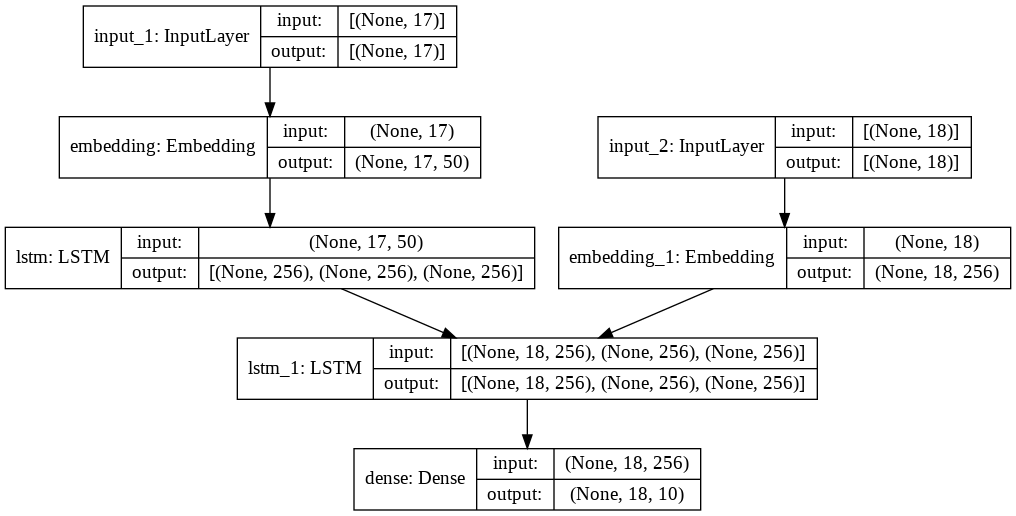

In [62]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [63]:
r = model.fit(
    [encoder_input_sequences, decoder_input_sequences],
    decoder_targets_one_hot,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=0.1,
)

Epoch 1/20
3/3 [==============================] - 9s 478ms/step - loss: 1.7358 - accuracy: 0.4925 - val_loss: 1.2417 - val_accuracy: 0.5820
Epoch 2/20
3/3 [==============================] - 0s 36ms/step - loss: 1.0221 - accuracy: 0.7126 - val_loss: 0.7240 - val_accuracy: 0.8307
Epoch 3/20
3/3 [==============================] - 0s 38ms/step - loss: 0.6269 - accuracy: 0.8297 - val_loss: 0.5632 - val_accuracy: 0.8810
Epoch 4/20
3/3 [==============================] - 0s 46ms/step - loss: 0.5244 - accuracy: 0.8802 - val_loss: 0.5162 - val_accuracy: 0.8783
Epoch 5/20
3/3 [==============================] - 0s 42ms/step - loss: 0.5307 - accuracy: 0.8372 - val_loss: 0.5083 - val_accuracy: 0.8598
Epoch 6/20
3/3 [==============================] - 0s 39ms/step - loss: 0.4623 - accuracy: 0.8769 - val_loss: 0.4183 - val_accuracy: 0.8942
Epoch 7/20
3/3 [==============================] - 0s 37ms/step - loss: 0.3801 - accuracy: 0.8976 - val_loss: 0.3712 - val_accuracy: 0.8889
Epoch 8/20
3/3 [==========

In [64]:
encoder_model = Model(encoder_inputs_placeholder, encoder_states)
decoder_state_input_h = Input(shape=(LSTM_NODES,))
decoder_state_input_c = Input(shape=(LSTM_NODES,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_inputs_single = Input(shape=(1,))
decoder_inputs_single_x = decoder_embedding(decoder_inputs_single)
decoder_outputs, h, c = decoder_lstm(decoder_inputs_single_x, initial_state=decoder_states_inputs)
decoder_states = [h, c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs_single] + decoder_states_inputs,
    [decoder_outputs] + decoder_states
)


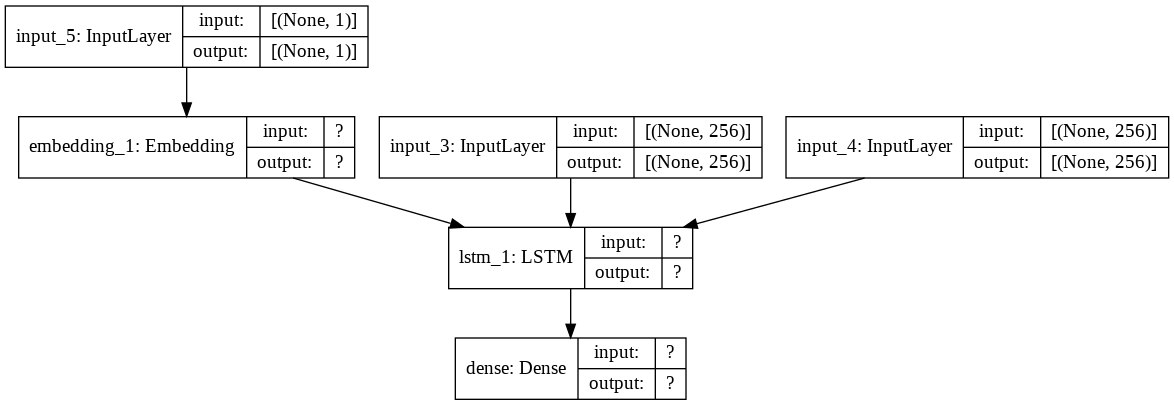

In [66]:
plot_model(decoder_model, to_file='model_plot_dec.png', show_shapes=True, show_layer_names=True)


In [67]:
idx2word_input = {v:k for k, v in word2idx_inputs.items()}
idx2word_target = {v:k for k, v in word2idx_outputs.items()}

In [68]:
def translate_sentence(input_seq):
    states_value = encoder_model.predict(input_seq)
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = word2idx_outputs['<sos>']
    eos = word2idx_outputs['<eos>']
    output_sentence = []

    for _ in range(max_out_len):
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        idx = np.argmax(output_tokens[0, 0, :])

        if eos == idx:
            break

        word = ''

        if idx > 0:
            word = idx2word_target[idx]
            output_sentence.append(word)

        target_seq[0, 0] = idx
        states_value = [h, c]

    return ' '.join(output_sentence)

In [71]:
i = 30
input_seq = encoder_input_sequences[i:i+1]
translation = translate_sentence(input_seq)
print('-')
print('Input:', input_sentences[i])
print('Response:', translation)

-
Input: how can i get from moosach to quiddestraße?
Response: <sos> blank blank blank blank blank blank blank blank blank blank blank blank blank blank blank blank blank


# **Intent finding / Classification Problem**

## **data preprocessing**

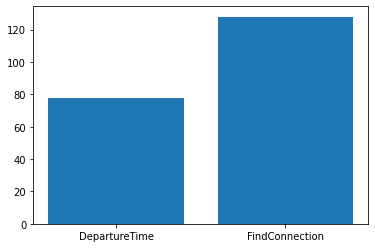

In [16]:
import matplotlib.pyplot as plt
plt.bar(list(set(intent)), [intent.count(each) for each in set(intent)])
plt.show()

In [12]:
#All Imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords 
from bs4 import BeautifulSoup
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
def remove_shorts(text):
  return " ".join([each for each in text.split() if len(each)>2])

clean_text_data = [remove_shorts(each) for each in text_data]

In [ ]:
clean_text_data

In [22]:
#Expanding Contractions
import re
cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

c_re = re.compile('(%s)' % '|'.join(cList.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text)

clean_text_data = [expandContractions(each) for each in clean_text_data]

#train['title']=train['title'].apply(expandContractions)
#train['text']=train['text'].apply(expandContractions)

In [8]:
import re
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;+_]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
def clean_text(text):

    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub(' ', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

clean_text_data = [clean_text(each) for each in clean_text_data]


In [10]:
lemmatizer = nltk.stem.WordNetLemmatizer()
prostem = nltk.stem.PorterStemmer()

def normalize(text , lemmatizer= lemmatizer, prostem = prostem):
  return " ".join(prostem.stem(lemmatizer.lemmatize(each)) for each in text.split())

def only_stem(text , lemmatizer= lemmatizer, prostem = prostem):
  return " ".join(prostem.stem(each) for each in text.split())

clean_text_data = [only_stem(each) for each in clean_text_data]


## **Model training**

In [18]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

x= clean_text_data
y=[1 if each=='FindConnection' else 0  for each in intent]


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
tfidf_v=TfidfVectorizer(max_features=10000,ngram_range=(1,2))
X=tfidf_v.fit_transform(x).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)


#Logistic regression
from sklearn.linear_model import LogisticRegression
modellr = LogisticRegression(random_state=0)
modellr.fit(X, y)
print("deone lr")

#Random forest
from sklearn.ensemble import RandomForestClassifier
modelrf = RandomForestClassifier()
modelrf.fit(X, y)
print('done rf')


deone lr
done rf


In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.text import Tokenizer


x= clean_text_data
vocab_size = 10000
tokenizer = Tokenizer(oov_token = "<OOV>", num_words=vocab_size)
tokenizer.fit_on_texts(x)
word_index = tokenizer.word_index
print(len(word_index))

sent_length = 15
sequences = tokenizer.texts_to_sequences(x)
padded = pad_sequences(sequences, padding = 'post', maxlen=sent_length)
print(padded[0])
print(padded.shape)
embedded_docs=padded

from tensorflow.keras.layers import Dropout
embedding_vector_features=16
model=Sequential()
model.add(Embedding(vocab_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.2))
model.add(LSTM(16))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

y=[1 if each=='FindConnection' else 0  for each in intent]

X_final=np.array(embedded_docs)
y_final=np.array(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)
print("trained NN model successfully")

140
[30 14  0  0  0  0  0  0  0  0  0  0  0  0  0]
(206, 15)
Epoch 1/10
3/3 [==============================] - 7s 269ms/step - loss: 0.6937 - accuracy: 0.4756 - val_loss: 0.6899 - val_accuracy: 0.6667
Epoch 2/10
3/3 [==============================] - 0s 17ms/step - loss: 0.6904 - accuracy: 0.6098 - val_loss: 0.6849 - val_accuracy: 0.6667
Epoch 3/10
3/3 [==============================] - 0s 17ms/step - loss: 0.6872 - accuracy: 0.6098 - val_loss: 0.6805 - val_accuracy: 0.6667
Epoch 4/10
3/3 [==============================] - 0s 19ms/step - loss: 0.6845 - accuracy: 0.6098 - val_loss: 0.6758 - val_accuracy: 0.6667
Epoch 5/10
3/3 [==============================] - 0s 18ms/step - loss: 0.6803 - accuracy: 0.6098 - val_loss: 0.6710 - val_accuracy: 0.6667
Epoch 6/10
3/3 [==============================] - 0s 17ms/step - loss: 0.6813 - accuracy: 0.6098 - val_loss: 0.6660 - val_accuracy: 0.6667
Epoch 7/10
3/3 [==============================] - 0s 18ms/step - loss: 0.6748 - accuracy: 0.6098 - val_l

## **Ensamble prediction**

In [27]:
pred_NN = model.predict(X_test)
pred_NN =[1 if each>0.5 else 0 for each in pred_NN]
#3from sklearn.metrics import precision_recall_fscore_support
#recision_recall_fscore_support(y_test, pred_NN)

In [ ]:
pred_NN

In [30]:
test_data = ['lets begin from jungle and end at home']
X=tfidf_v.transform(test_data).toarray()

#ensamble predicton


pred_modellr = modellr.predict(X)
pred_modelrf = modelrf.predict(X)

In [36]:
test_sequences = tokenizer.texts_to_sequences(test_data)
test_padded = pad_sequences(test_sequences, padding = 'post', maxlen=sent_length)


X_final=np.array(test_padded)
pred_NN = [1 if each>0.5 else 0 for each in model.predict(X_final)]

In [38]:
pred=[]
for index in range(len(pred_NN)):
  pred.append(int((pred_NN[index]*0.4) + (pred_modelrf[index]*0.3) + (pred_modellr[index]*0.3)))

In [39]:
pred

[1]